PRE-PROCESSING

In [ ]:
import pandas as pd
df = pd.read_csv('/content/mainSimulationAccessTraces.csv')
df

,sourceID,sourceAddress,sourceType,sourceLocation,destinationServiceAddress,destinationServiceType,destinationLocation,accessedNodeAddress,accessedNodeType,operation,value,timestamp,normality
0,lightcontrol2,/agent2/lightcontrol2,/lightControler,BedroomParents,/agent2/lightcontrol2,/lightControler,BedroomParents,/agent2/lightcontrol2,/lightControler,registerService,none,1520031600000,normal
1,lightcontrol3,/agent3/lightcontrol3,/lightControler,Dinningroom,/agent3/lightcontrol3,/lightControler,Dinningroom,/agent3/lightcontrol3,/lightControler,registerService,none,1520031603269,normal
2,lightcontrol1,/agent1/lightcontrol1,/lightControler,BedroomChildren,/agent1/lightcontrol1,/lightControler,BedroomChildren,/agent1/lightcontrol1,/lightControler,registerService,none,1520031603279,normal
3,lightcontrol4,/agent4/lightcontrol4,/lightControler,Kitchen,/agent4/lightcontrol4,/lightControler,Kitchen,/agent4/lightcontrol4,/lightControler,registerService,none,1520031603290,normal
4,movement4,/agent4/movement4,/movementSensor,Kitchen,/agent4/movement4,/movementSensor,Kitchen,/agent4/movement4,/movementSensor,registerService,none,1520031603464,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
357947,lightcontrol23,/agent23/lightcontrol23,/lightControler,room_4,/agent23/tempin23,/sensorService,room_4,/agent23/tempin23,/sensorService,read,20.3479,1520117997001,normal
357948,washingmachine2,/agent11/washingmachine2,/washingService,Watterroom,/agent11/battery4,/batteryService,Watterroom,/agent11/battery4/charge,/basic/number,read,9,1520117997339,normal
357949,washingmachine2,/agent11/washingmachine2,/washingService,Watterroom,/agent11/battery4,/batteryService,Watterroom,/agent11/battery4/charging,/basic/text,read,true,1520117997401,normal
357950,lightcontrol28,/agent28/lightcontrol28,/lightControler,room_9,/agent28/movement28,/movementSensor,room_9,/agent28/movement28/movement,/derived/boolean,read,0,1520117998907,normal


In [ ]:

print('unique values of all columns:', *[df[i].unique() for i in list(df.columns)], sep='\n\n\n')

unique values of all columns:


['lightcontrol2' 'lightcontrol3' 'lightcontrol1' 'lightcontrol4'
 'movement4' 'tempin2' 'movement2' 'tempin4' 'tempin1' 'movement1'
 'movement3' 'tempin3' 'movement5' 'lightcontrol5' 'tempin5' 'movement6'
 'lightcontrol6' 'movement10' 'tempin6' 'movement11' 'lightcontrol10'
 'lightcontrol11' 'movement13' 'lightcontrol12' 'movement12'
 'lightcontrol13' 'movement14' 'lightcontrol14' 'tempin10' 'tempin11'
 'tempin13' 'movement20' 'tempin14' 'tempin20' 'lightcontrol20'
 'movement21' 'tempin21' 'movement22' 'lightcontrol21' 'lightcontrol22'
 'lightcontrol23' 'tempin23' 'tempin22' 'movement23' 'lightcontrol24'
 'movement24' 'tempin25' 'lightcontrol25' 'tempin24' 'movement26'
 'tempin28' 'movement25' 'tempin26' 'movement27' 'lightcontrol26'
 'tempin27' 'lightcontrol27' 'lightcontrol29' 'movement29'
 'lightcontrol28' 'movement28' 'tempin29' 'battery2' 'battery3' 'battery6'
 'battery5' 'battery1' 'doorlock1' 'battery4' 'doorlock2' 'doorlock3'
 'doorlock5' 'doorlo

In [ ]:
print('null values:\n\n', df.isnull().sum(), sep='')

null values:

sourceID                        0
sourceAddress                   0
sourceType                      0
sourceLocation                  0
destinationServiceAddress       0
destinationServiceType          0
destinationLocation             0
accessedNodeAddress             0
accessedNodeType              148
operation                       0
value                        2050
timestamp                       0
normality                       0
dtype: int64


In [ ]:
na_rep_data = df.fillna(0)
print('null values after filling na:\n')
na_rep_data.isnull().sum()

null values after filling na:



sourceID                     0
sourceAddress                0
sourceType                   0
sourceLocation               0
destinationServiceAddress    0
destinationServiceType       0
destinationLocation          0
accessedNodeAddress          0
accessedNodeType             0
operation                    0
value                        0
timestamp                    0
normality                    0
dtype: int64

In [ ]:
print('data after filling na:\n')
na_rep_data.count()

data after filling na:



sourceID                     357952
sourceAddress                357952
sourceType                   357952
sourceLocation               357952
destinationServiceAddress    357952
destinationServiceType       357952
destinationLocation          357952
accessedNodeAddress          357952
accessedNodeType             357952
operation                    357952
value                        357952
timestamp                    357952
normality                    357952
dtype: int64

In [ ]:
print('none, true, false values in value column:\n')
print(len(na_rep_data[na_rep_data.value == 'none']),
len(na_rep_data[na_rep_data.value == 'true']),
len(na_rep_data[na_rep_data.value == 'false']), sep = '\n')

none, true, false values in value column:

106
14460
25966


In [ ]:
none_rep_data = na_rep_data.replace(['none', 'true', 'false', '0', 'False', 'True'], [0, 1, 0, 0, 0, 1])
none_rep_data
#none, true, false replaced by 0, 1, 0

,sourceID,sourceAddress,sourceType,sourceLocation,destinationServiceAddress,destinationServiceType,destinationLocation,accessedNodeAddress,accessedNodeType,operation,value,timestamp,normality
0,lightcontrol2,/agent2/lightcontrol2,/lightControler,BedroomParents,/agent2/lightcontrol2,/lightControler,BedroomParents,/agent2/lightcontrol2,/lightControler,registerService,0,1520031600000,normal
1,lightcontrol3,/agent3/lightcontrol3,/lightControler,Dinningroom,/agent3/lightcontrol3,/lightControler,Dinningroom,/agent3/lightcontrol3,/lightControler,registerService,0,1520031603269,normal
2,lightcontrol1,/agent1/lightcontrol1,/lightControler,BedroomChildren,/agent1/lightcontrol1,/lightControler,BedroomChildren,/agent1/lightcontrol1,/lightControler,registerService,0,1520031603279,normal
3,lightcontrol4,/agent4/lightcontrol4,/lightControler,Kitchen,/agent4/lightcontrol4,/lightControler,Kitchen,/agent4/lightcontrol4,/lightControler,registerService,0,1520031603290,normal
4,movement4,/agent4/movement4,/movementSensor,Kitchen,/agent4/movement4,/movementSensor,Kitchen,/agent4/movement4,/movementSensor,registerService,0,1520031603464,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
357947,lightcontrol23,/agent23/lightcontrol23,/lightControler,room_4,/agent23/tempin23,/sensorService,room_4,/agent23/tempin23,/sensorService,read,20.3479,1520117997001,normal
357948,washingmachine2,/agent11/washingmachine2,/washingService,Watterroom,/agent11/battery4,/batteryService,Watterroom,/agent11/battery4/charge,/basic/number,read,9,1520117997339,normal
357949,washingmachine2,/agent11/washingmachine2,/washingService,Watterroom,/agent11/battery4,/batteryService,Watterroom,/agent11/battery4/charging,/basic/text,read,1,1520117997401,normal
357950,lightcontrol28,/agent28/lightcontrol28,/lightControler,room_9,/agent28/movement28,/movementSensor,room_9,/agent28/movement28/movement,/derived/boolean,read,0,1520117998907,normal


In [ ]:
none_rep_data.dtypes

#datatypes of features

sourceID                     object
sourceAddress                object
sourceType                   object
sourceLocation               object
destinationServiceAddress    object
destinationServiceType       object
destinationLocation          object
accessedNodeAddress          object
accessedNodeType             object
operation                    object
value                        object
timestamp                     int64
normality                    object
dtype: object

In [ ]:
# value counts of each feature

# none_rep_data['sourceID'].value_counts()
[none_rep_data[i].value_counts() for i in list(df.columns)]

[sourceID
 washingmachine1        17908
 washingmachine3        17316
 battery4               15023
 battery5               14543
 battery1               14499
                        ...  
 movement1                 37
 questioningservice2       18
 doorlock4                 17
 doorlock3                  4
 doorlock5                  4
 Name: count, Length: 84, dtype: int64,
 sourceAddress
 /agent6/washingmachine1     17908
 /agent14/washingmachine3    17240
 /agent11/battery4           15023
 /agent12/battery5           14543
 /agent5/battery1            14499
                             ...  
 /agent4/doorlock4              13
 /agent21/doorlock5              4
 /agent10/doorlock2              4
 /agent12/doorlock3              4
 /agent20/doorlock4              4
 Name: count, Length: 89, dtype: int64,
 sourceType
 /lightControler     135775
 /sensorService       85196
 /batteryService      81273
 /washingService      47986
 /thermostat           5980
 /movementSensor       1301


In [ ]:
drop_index = none_rep_data[none_rep_data['value'].str.startswith('org.ds2os', na=False)].index

none_rep_data = none_rep_data.drop(drop_index, axis = 0)

# none_rep_data[none_rep_data['value'].str.startswith('org.ds2os', na=False)]

# to drop values starting from org.ds2os

In [ ]:
none_rep_data[none_rep_data['value'] == 'twenty']

rep_twenty = none_rep_data.replace('twenty', 20)

rep_twenty[rep_twenty['value'] == 'twenty']

# replaced twenty with 20

,sourceID,sourceAddress,sourceType,sourceLocation,destinationServiceAddress,destinationServiceType,destinationLocation,accessedNodeAddress,accessedNodeType,operation,value,timestamp,normality


In [ ]:
rep_twenty['value'] = rep_twenty['value'].astype(float)

val_float = rep_twenty

val_float.dtypes

# convert value column to float64

sourceID                      object
sourceAddress                 object
sourceType                    object
sourceLocation                object
destinationServiceAddress     object
destinationServiceType        object
destinationLocation           object
accessedNodeAddress           object
accessedNodeType              object
operation                     object
value                        float64
timestamp                      int64
normality                     object
dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

val_float['sourceID_code'] = le.fit_transform(val_float['sourceID'])

val_float[['sourceID', 'sourceID_code']].drop_duplicates()
# max(val_float['sourceID_code'])

# encoded source id

,sourceID,sourceID_code
0,lightcontrol2,21
1,lightcontrol3,32
2,lightcontrol1,15
3,lightcontrol4,33
4,movement4,55
...,...,...
274,washingmachine3,83
32790,questioningservice3,60
47158,questioningservice1,58
51796,lightcontrol7,36


In [ ]:
sourceID_frame = val_float[['sourceID', 'sourceID_code']].drop_duplicates()
source_ID_dict = {}
for index, row in sourceID_frame.iterrows():
    source_ID_dict[row['sourceID']] = row['sourceID_code']
source_ID_dict

{'lightcontrol2': 21,
 'lightcontrol3': 32,
 'lightcontrol1': 15,
 'lightcontrol4': 33,
 'movement4': 55,
 'tempin2': 66,
 'movement2': 43,
 'tempin4': 78,
 'tempin1': 61,
 'movement1': 37,
 'movement3': 54,
 'tempin3': 77,
 'movement5': 56,
 'lightcontrol5': 34,
 'tempin5': 79,
 'movement6': 57,
 'lightcontrol6': 35,
 'movement10': 38,
 'tempin6': 80,
 'movement11': 39,
 'lightcontrol10': 16,
 'lightcontrol11': 17,
 'movement13': 41,
 'lightcontrol12': 18,
 'movement12': 40,
 'lightcontrol13': 19,
 'movement14': 42,
 'lightcontrol14': 20,
 'tempin10': 62,
 'tempin11': 63,
 'tempin13': 64,
 'movement20': 44,
 'tempin14': 65,
 'tempin20': 67,
 'lightcontrol20': 22,
 'movement21': 45,
 'tempin21': 68,
 'movement22': 46,
 'lightcontrol21': 23,
 'lightcontrol22': 24,
 'lightcontrol23': 25,
 'tempin23': 70,
 'tempin22': 69,
 'movement23': 47,
 'lightcontrol24': 26,
 'movement24': 48,
 'tempin25': 72,
 'lightcontrol25': 27,
 'tempin24': 71,
 'movement26': 50,
 'tempin28': 75,
 'movement25': 

In [ ]:
val_float['accessedNodeType'] = val_float['accessedNodeType'].replace(0, '0')
val_float['accessedNodeType'].unique()

# converting int to string for 0 in val_float

array(['/lightControler', '/movementSensor', '/sensorService',
       '/derived/boolean', '/basic/number', '/batteryService',
       '/doorLockService', '/thermostat', '/washingService',
       '/basic/text', '/smartPhone', '0', '/basic/composed'], dtype=object)

In [ ]:
# encoded categorical values to numerical values

# val_float.head(5)

val_float['sourceAddress_code'] = le.fit_transform(val_float['sourceAddress'])
val_float['sourceType_code'] = le.fit_transform(val_float['sourceType'])
val_float['sourceLocation_code'] = le.fit_transform(val_float['sourceLocation'])
val_float['destinationServiceAddress_code'] = le.fit_transform(val_float['destinationServiceAddress'])
val_float['destinationServiceType_code'] = le.fit_transform(val_float['destinationServiceType'])
val_float['destinationLocation_code'] = le.fit_transform(val_float['destinationLocation'])
val_float['accessedNodeAddress_code'] = le.fit_transform(val_float['accessedNodeAddress'])
val_float['accessedNodeType_code'] = le.fit_transform(val_float['accessedNodeType'])
val_float['operation_code'] = le.fit_transform(val_float['operation'])
val_float['normality_code'] = le.fit_transform(val_float['normality'])


encoded_data = val_float

encoded_data.head(10)
encoded_data.columns

Index(['sourceID', 'sourceAddress', 'sourceType', 'sourceLocation',
       'destinationServiceAddress', 'destinationServiceType',
       'destinationLocation', 'accessedNodeAddress', 'accessedNodeType',
       'operation', 'value', 'timestamp', 'normality', 'sourceID_code',
       'sourceAddress_code', 'sourceType_code', 'sourceLocation_code',
       'destinationServiceAddress_code', 'destinationServiceType_code',
       'destinationLocation_code', 'accessedNodeAddress_code',
       'accessedNodeType_code', 'operation_code', 'normality_code'],
      dtype='object')

In [ ]:
import pickle

column_headings = ['sourceID', 'sourceID_code', 'sourceAddress',
       'sourceAddress_code', 'sourceType', 'sourceType_code', 'sourceLocation', 'sourceLocation_code',
       'destinationServiceAddress',
       'destinationServiceAddress_code', 'destinationServiceType', 'destinationServiceType_code',
       'destinationLocation',
       'destinationLocation_code', 'accessedNodeAddress', 'accessedNodeAddress_code', 'accessedNodeType',
       'accessedNodeType_code',
       'operation', 'operation_code', 'normality', 'normality_code']

drop_down_data = {}
for i in range(len(column_headings)-1): # loop through column headings - heading, code
    if(i%2==1): continue # pass for code iteration (i+1 is accessed later)
    print(i, column_headings[i], column_headings[i+1]) #just printing - debugging
    temp_frame = val_float[[column_headings[i], column_headings[i+1]]].drop_duplicates() # create frame for heading - heading, code
    temp_dict = {}
    for index, row in temp_frame.iterrows(): # iterate through temp frame - heading's ind data frame
        temp_dict[row[column_headings[i]]] = row[column_headings[i+1]] # create dictionary for heading
    drop_down_data[column_headings[i]] = temp_dict # add temp dict to main dict

# parameter_values

file = open('drop_down_pickle', 'wb')
pickle.dump(drop_down_data, file)

drop_down_data

0 sourceID sourceID_code
2 sourceAddress sourceAddress_code
4 sourceType sourceType_code
6 sourceLocation sourceLocation_code
8 destinationServiceAddress destinationServiceAddress_code
10 destinationServiceType destinationServiceType_code
12 destinationLocation destinationLocation_code
14 accessedNodeAddress accessedNodeAddress_code
16 accessedNodeType accessedNodeType_code
18 operation operation_code
20 normality normality_code


{'sourceID': {'lightcontrol2': 21,
  'lightcontrol3': 32,
  'lightcontrol1': 15,
  'lightcontrol4': 33,
  'movement4': 55,
  'tempin2': 66,
  'movement2': 43,
  'tempin4': 78,
  'tempin1': 61,
  'movement1': 37,
  'movement3': 54,
  'tempin3': 77,
  'movement5': 56,
  'lightcontrol5': 34,
  'tempin5': 79,
  'movement6': 57,
  'lightcontrol6': 35,
  'movement10': 38,
  'tempin6': 80,
  'movement11': 39,
  'lightcontrol10': 16,
  'lightcontrol11': 17,
  'movement13': 41,
  'lightcontrol12': 18,
  'movement12': 40,
  'lightcontrol13': 19,
  'movement14': 42,
  'lightcontrol14': 20,
  'tempin10': 62,
  'tempin11': 63,
  'tempin13': 64,
  'movement20': 44,
  'tempin14': 65,
  'tempin20': 67,
  'lightcontrol20': 22,
  'movement21': 45,
  'tempin21': 68,
  'movement22': 46,
  'lightcontrol21': 23,
  'lightcontrol22': 24,
  'lightcontrol23': 25,
  'tempin23': 70,
  'tempin22': 69,
  'movement23': 47,
  'lightcontrol24': 26,
  'movement24': 48,
  'tempin25': 72,
  'lightcontrol25': 27,
  'tempi

In [ ]:
pp_data = pd.concat([encoded_data.iloc[:, 13:23], encoded_data['value'], encoded_data['timestamp'], encoded_data.iloc[:, 23]], axis=1)

pp_data.head(5)



,sourceID_code,sourceAddress_code,sourceType_code,sourceLocation_code,destinationServiceAddress_code,destinationServiceType_code,destinationLocation_code,accessedNodeAddress_code,accessedNodeType_code,operation_code,value,timestamp,normality_code
0,21,30,2,3,30,2,3,59,6,2,0.0,1520031600000,7
1,32,70,2,4,68,2,4,134,6,2,0.0,1520031603269,7
2,15,1,2,2,0,2,2,0,6,2,0.0,1520031603279,7
3,33,77,2,7,73,2,7,144,6,2,0.0,1520031603290,7
4,55,78,3,7,74,3,7,146,7,2,0.0,1520031603464,7


In [ ]:
pp_data.to_csv('ds2os_preprocessed.csv')

In [ ]:
pp_data.drop(columns=['timestamp'], inplace=True)

PRE-PROCESSED DATA

In [ ]:

import pandas as pd
data = pd.read_csv('/content/ds2os_preprocessed.csv')
data= data.drop(columns="Unnamed: 0")
data

,sourceID_code,sourceAddress_code,sourceType_code,sourceLocation_code,destinationServiceAddress_code,destinationServiceType_code,destinationLocation_code,accessedNodeAddress_code,accessedNodeType_code,operation_code,value,timestamp,normality_code
0,21,30,2,3,30,2,3,59,6,2,0.0000,1520031600000,7
1,32,70,2,4,68,2,4,134,6,2,0.0000,1520031603269,7
2,15,1,2,2,0,2,2,0,6,2,0.0000,1520031603279,7
3,33,77,2,7,73,2,7,144,6,2,0.0000,1520031603290,7
4,55,78,3,7,74,3,7,146,7,2,0.0000,1520031603464,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
357936,25,46,2,15,46,4,15,92,8,1,20.3479,1520117997001,7
357937,82,14,7,10,8,0,10,16,1,1,9.0000,1520117997339,7
357938,82,14,7,10,8,0,10,17,2,1,1.0000,1520117997401,7
357939,30,62,2,20,61,3,20,122,4,1,0.0000,1520117998907,7


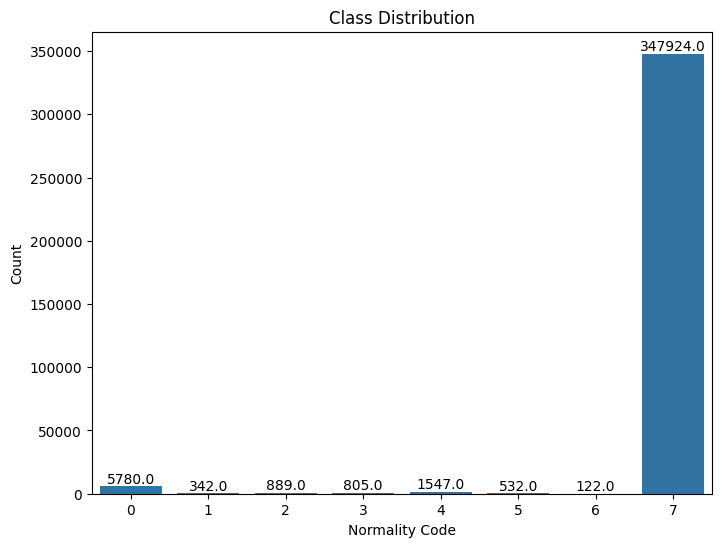

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot class distribution
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='normality_code', data=data)
plt.title('Class Distribution')
plt.xlabel('Normality Code')
plt.ylabel('Count')

# Add numbers on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()


FEATURE IMPORTANCE

In [ ]:
# Univariate Selection

import numpy as np

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

ind_col = data.iloc[:,0:11]  #independent columns
target = data.iloc[:,-1]    #target column i.e normality code

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=11)
fit = bestfeatures.fit(ind_col,target)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(ind_col.columns)

#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(11,'Score'))  #print 10 best features

                             Specs         Score
10                           value  2.518335e+13
0                    sourceID_code  1.367500e+05
7         accessedNodeAddress_code  5.005638e+04
1               sourceAddress_code  4.536765e+04
4   destinationServiceAddress_code  2.647609e+04
3              sourceLocation_code  2.472489e+04
6         destinationLocation_code  2.451381e+04
5      destinationServiceType_code  1.411899e+04
2                  sourceType_code  9.976323e+03
9                   operation_code  3.363600e+03
8            accessedNodeType_code  3.184023e+03


[0.13496942 0.05506908 0.1487141  0.07076983 0.06216487 0.17768332
 0.06663143 0.05336914 0.09400341 0.05744161 0.07918379]


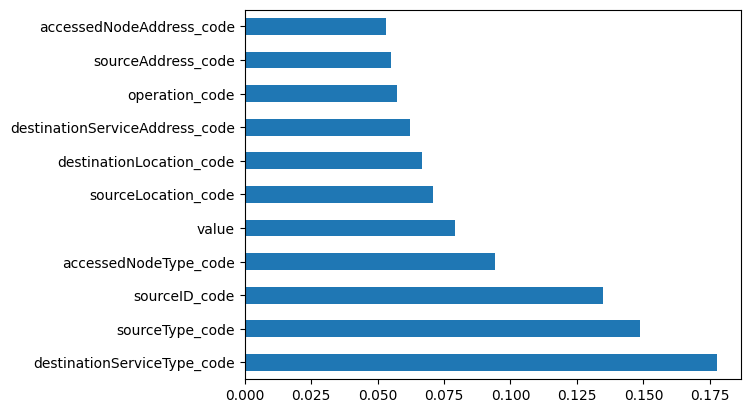

In [ ]:
# Feature Importance

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model_extra = ExtraTreesClassifier()
model_extra.fit(ind_col,target)
print(model_extra.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model_extra.feature_importances_, index=ind_col.columns)
feat_importances.nlargest(11).plot(kind='barh')
plt.show()

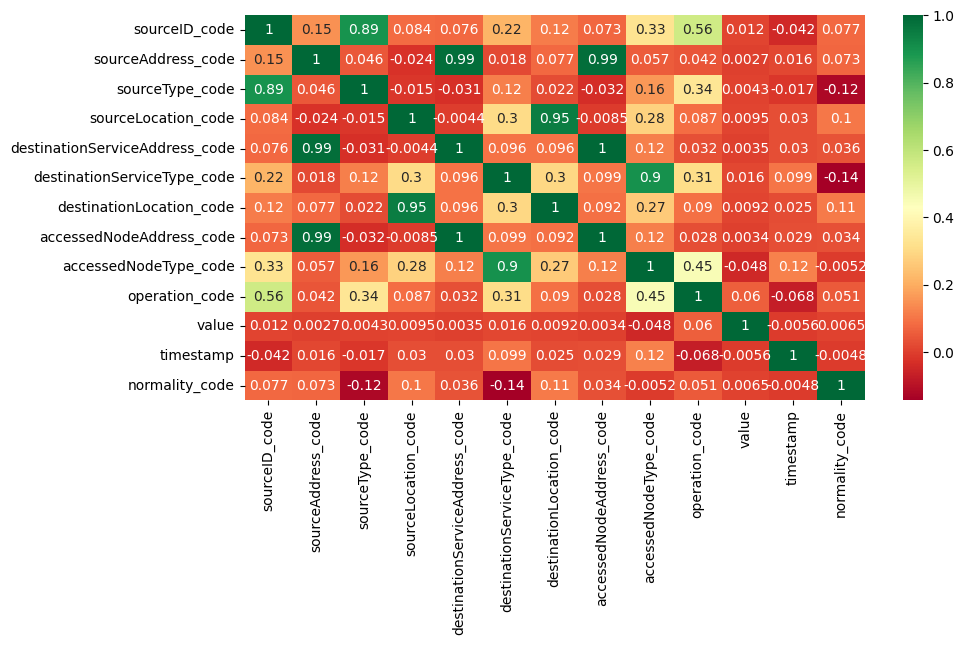

In [ ]:
# Correlation Matrix with Heatmap

import seaborn as sns
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,5))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")
# can combine
# sourceAddress - destinationServiceAddress - accessedNodeAddress
# sourceLocation - destinationLocation

FEATURE EXTRACTION

In [ ]:
#combination - 1
import pandas as pd

# Create a copy of the original DataFrame
extracted_data = data.copy()

# Convert the Unicode string column to int64
data['destinationLocation_code'] = data['destinationLocation_code'].astype('int64')

# Perform the addition operation
extracted_data['location_relationship'] = data['sourceLocation_code'] + data['destinationLocation_code']


# Save the modified DataFrame to a new CSV file
extracted_data.to_csv('feature_extracted.csv', index=False)

print("Features extracted successfully- combination1.")


Features extracted successfully- combination1.


In [ ]:
#combination - 2
# sourceAddress - destinationServiceAddress - accessedNodeAddress - feature extarction
extracted_data['address_relationship'] = data['sourceAddress_code'] + data['destinationServiceAddress_code']+ data['accessedNodeAddress_code']


# Save the modified DataFrame to a new CSV file
extracted_data.to_csv('feature_extracted1.csv', index=False)
print("Features extracted successfully- combination2.")

Features extracted successfully- combination2.


In [ ]:
#combination - 3
# sourceType - accessedNodeAddress - sourceAddress - feature extarction
extracted_data['source_relationship'] = data['sourceAddress_code'] + data['sourceType_code']+ data['accessedNodeAddress_code']


# Save the modified DataFrame to a new CSV file
extracted_data.to_csv('feature_extracted2.csv', index=False)
print("Features extracted successfully- combination3.")

Features extracted successfully- combination3.


In [ ]:
import pandas as pd
# Read the CSV file into a DataFrame
fe = pd.read_csv('/content/feature_extracted.csv')
fe


,sourceID_code,sourceAddress_code,sourceType_code,sourceLocation_code,destinationServiceAddress_code,destinationServiceType_code,destinationLocation_code,accessedNodeAddress_code,accessedNodeType_code,operation_code,value,timestamp,normality_code,location_relationship
0,21,30,2,3,30,2,3,59,6,2,0.0000,1520031600000,7,6
1,32,70,2,4,68,2,4,134,6,2,0.0000,1520031603269,7,8
2,15,1,2,2,0,2,2,0,6,2,0.0000,1520031603279,7,4
3,33,77,2,7,73,2,7,144,6,2,0.0000,1520031603290,7,14
4,55,78,3,7,74,3,7,146,7,2,0.0000,1520031603464,7,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357936,25,46,2,15,46,4,15,92,8,1,20.3479,1520117997001,7,30
357937,82,14,7,10,8,0,10,16,1,1,9.0000,1520117997339,7,20
357938,82,14,7,10,8,0,10,17,2,1,1.0000,1520117997401,7,20
357939,30,62,2,20,61,3,20,122,4,1,0.0000,1520117998907,7,40


In [ ]:
# Read the CSV file into a DataFrame
fe1 = pd.read_csv('/content/feature_extracted1.csv')
fe1

,sourceID_code,sourceAddress_code,sourceType_code,sourceLocation_code,destinationServiceAddress_code,destinationServiceType_code,destinationLocation_code,accessedNodeAddress_code,accessedNodeType_code,operation_code,value,timestamp,normality_code,location_relationship,address_relationship
0,21,30,2,3,30,2,3,59,6,2,0.0000,1520031600000,7,6,119
1,32,70,2,4,68,2,4,134,6,2,0.0000,1520031603269,7,8,272
2,15,1,2,2,0,2,2,0,6,2,0.0000,1520031603279,7,4,1
3,33,77,2,7,73,2,7,144,6,2,0.0000,1520031603290,7,14,294
4,55,78,3,7,74,3,7,146,7,2,0.0000,1520031603464,7,14,298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357936,25,46,2,15,46,4,15,92,8,1,20.3479,1520117997001,7,30,184
357937,82,14,7,10,8,0,10,16,1,1,9.0000,1520117997339,7,20,38
357938,82,14,7,10,8,0,10,17,2,1,1.0000,1520117997401,7,20,39
357939,30,62,2,20,61,3,20,122,4,1,0.0000,1520117998907,7,40,245


In [ ]:
# Read the CSV file into a DataFrame
fe2 = pd.read_csv('/content/feature_extracted2.csv')

# List of features to drop
features_to_drop = ['sourceAddress_code', 'sourceLocation_code','destinationServiceAddress_code','destinationLocation_code','accessedNodeAddress_code','accessedNodeType_code','operation_code','source_relationship']

# Drop the specified features
orinial_data = fe2.drop(features_to_drop, axis=1)

# Save the filtered dataset
orinial_data.to_csv("orinial_data.csv", index=False)


In [ ]:

fe3 = pd.read_csv('/content/orinial_data.csv')
fe3

,sourceID_code,sourceType_code,destinationServiceType_code,value,timestamp,normality_code,location_relationship,address_relationship
0,21,2,2,0.0000,1520031600000,7,6,119
1,32,2,2,0.0000,1520031603269,7,8,272
2,15,2,2,0.0000,1520031603279,7,4,1
3,33,2,2,0.0000,1520031603290,7,14,294
4,55,3,3,0.0000,1520031603464,7,14,298
...,...,...,...,...,...,...,...,...
357936,25,2,4,20.3479,1520117997001,7,30,184
357937,82,7,0,9.0000,1520117997339,7,20,38
357938,82,7,0,1.0000,1520117997401,7,20,39
357939,30,2,3,0.0000,1520117998907,7,40,245


In [ ]:
#correlation - 1
import pandas as pd

# Calculate the correlation matrix
correlation_matrix = fe[['sourceLocation_code', 'destinationLocation_code', 'location_relationship', 'normality_code']].corr()

# Extract the correlation coefficients between location_relationship and normality_code
correlation_location_relationship = correlation_matrix.loc['location_relationship', 'normality_code']

# Extract the correlation coefficients between sourceLocation_code and normality_code
correlation_source_location = correlation_matrix.loc['sourceLocation_code', 'normality_code']

# Extract the correlation coefficients between destinationLocation_code and normality_code
correlation_destination_location = correlation_matrix.loc['destinationLocation_code', 'normality_code']

print("Correlation between location_relationship and normality_code:", correlation_location_relationship)
print("Correlation between sourceLocation_code and normality_code:", correlation_source_location)
print("Correlation between destinationLocation_code and normality_code:", correlation_destination_location)


Correlation between location_relationship and normality_code: 0.10882495799985813
Correlation between sourceLocation_code and normality_code: 0.1040114682761716
Correlation between destinationLocation_code and normality_code: 0.11109541844622962


In [ ]:
#correlation - 2
import pandas as pd

# Calculate the correlation matrix
correlation_matrix = fe1[['sourceAddress_code', 'destinationServiceAddress_code', 'accessedNodeAddress_code','address_relationship', 'normality_code']].corr()

# Extract the correlation coefficients between location_relationship and normality_code
correlation_address_relationship = correlation_matrix.loc['address_relationship', 'normality_code']

# Extract the correlation coefficients between sourceLocation_code and normality_code
correlation_source_address = correlation_matrix.loc['sourceAddress_code', 'normality_code']

# Extract the correlation coefficients between destinationLocation_code and normality_code
correlation_destination_address = correlation_matrix.loc['destinationServiceAddress_code', 'normality_code']

correlation_node = correlation_matrix.loc['accessedNodeAddress_code', 'normality_code']


print("Correlation between address_relationship and normality_code:", correlation_address_relationship)
print("Correlation between sourceAddress_code and normality_code:", correlation_source_address)
print("Correlation between destinationServiceAddress_code and normality_code:", correlation_source_address)
print("Correlation between accessedNodeAddress_code and normality_code:", correlation_node)

Correlation between address_relationship and normality_code: 0.044918612149788
Correlation between sourceAddress_code and normality_code: 0.07274309779181376
Correlation between destinationServiceAddress_code and normality_code: 0.07274309779181376
Correlation between accessedNodeAddress_code and normality_code: 0.03444524895575274


In [ ]:
#correlation - 3
import pandas as pd

# Calculate the correlation matrix
correlation_matrix = fe2[['sourceAddress_code', 'sourceType_code', 'accessedNodeAddress_code','source_relationship', 'normality_code']].corr()

# Extract the correlation coefficients between location_relationship and normality_code
correlation_source_relationship = correlation_matrix.loc['source_relationship', 'normality_code']

# Extract the correlation coefficients between sourceLocation_code and normality_code
correlation_source = correlation_matrix.loc['sourceAddress_code', 'normality_code']

# Extract the correlation coefficients between destinationLocation_code and normality_code
correlation_type = correlation_matrix.loc['sourceType_code', 'normality_code']

correlation_accessed = correlation_matrix.loc['accessedNodeAddress_code', 'normality_code']


print("Correlation between source_relationship and normality_code:", correlation_source_relationship)
print("Correlation between sourceAddress_code and normality_code:", correlation_source)
print("Correlation between sourceType_code and normality_code:", correlation_type)
print("Correlation between accessedNodeAddress_code and normality_code:", correlation_accessed)

Correlation between source_relationship and normality_code: 0.04435293234040993
Correlation between sourceAddress_code and normality_code: 0.07274309779181376
Correlation between sourceType_code and normality_code: -0.12290868145597998
Correlation between accessedNodeAddress_code and normality_code: 0.03444524895575274


FEATURE VECTORS

In [ ]:

# Select the desired features
selected_features = ['location_relationship', 'destinationServiceType_code', 'sourceType_code', 'sourceID_code', 'value']

# Print the feature vectors
feature_vectors = fe[selected_features]
print("Feature Vectors:")
print(feature_vectors)


Feature Vectors:
        location_relationship  destinationServiceType_code  sourceType_code  \
0                           6                            2                2   
1                           8                            2                2   
2                           4                            2                2   
3                          14                            2                2   
4                          14                            3                3   
...                       ...                          ...              ...   
357936                     30                            4                2   
357937                     20                            0                7   
357938                     20                            0                7   
357939                     40                            3                2   
357940                     40                            4                2   

        sourceID_code    value  
0

In [ ]:

# Select the desired features
selected_features = ['location_relationship', 'destinationServiceType_code', 'sourceType_code', 'sourceID_code', 'value']

# Get feature vectors as a matrix
feature_matrix = fe[selected_features].values

# Print the feature matrix
print("Feature Vectors:")
print(feature_matrix)

Feature Vectors:
[[ 6.      2.      2.     21.      0.    ]
 [ 8.      2.      2.     32.      0.    ]
 [ 4.      2.      2.     15.      0.    ]
 ...
 [20.      0.      7.     82.      1.    ]
 [40.      3.      2.     30.      0.    ]
 [40.      4.      2.     30.     20.4131]]


DATA SPLIT

In [ ]:

from sklearn.model_selection import train_test_split
# Separate selected features and target variable (if applicable)
X = fe[selected_features]
y = fe['normality_code']

# Optionally, perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (286352, 5)
Shape of y_train: (286352,)
Shape of X_test: (71589, 5)
Shape of y_test: (71589,)


RDL MODEL TRAINING

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
r_model = RandomForestClassifier()
r_model.fit(X_train, y_train)

# Get predictions from Random Forest model
r_predictions = r_model.predict(X_test)

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

dnn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(8, activation='softmax')
])

# Compile the DNN model
dnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Train the DNN model
dnn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Get predictions from DNN model
dnn_predictions = dnn_model.predict(X_test)


Epoch 1/10
7159/7159 [==============================] - 30s 4ms/step - loss: 362168.9375 - accuracy: 0.9847 - val_loss: 0.0367 - val_accuracy: 0.9885
Epoch 2/10
7159/7159 [==============================] - 26s 4ms/step - loss: 33913.0547 - accuracy: 0.9892 - val_loss: 0.0275 - val_accuracy: 0.9896
Epoch 3/10
7159/7159 [==============================] - 27s 4ms/step - loss: 0.0245 - accuracy: 0.9906 - val_loss: 0.0240 - val_accuracy: 0.9908
Epoch 4/10
7159/7159 [==============================] - 28s 4ms/step - loss: 0.0221 - accuracy: 0.9911 - val_loss: 0.0200 - val_accuracy: 0.9908
Epoch 5/10
7159/7159 [==============================] - 27s 4ms/step - loss: 0.0209 - accuracy: 0.9915 - val_loss: 0.0216 - val_accuracy: 0.9918
Epoch 6/10
7159/7159 [==============================] - 27s 4ms/step - loss: 0.0206 - accuracy: 0.9915 - val_loss: 0.0230 - val_accuracy: 0.9906
Epoch 7/10
7159/7159 [==============================] - 27s 4ms/step - loss: 0.0203 - accuracy: 0.9917 - val_loss: 0.0213

In [ ]:
from sklearn.linear_model import LogisticRegression
# Combine predictions from Random Forest and DNN
c_predictions = np.column_stack((r_predictions, dnn_predictions))

# Train Logistic Regression
logreg_model = LogisticRegression()
logreg_model.fit(c_predictions, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Test Accuracy: 0.9925686907206415
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.66      0.79      1166
           1       0.72      0.67      0.69        78
           2       1.00      0.99      0.99       186
           3       1.00      0.44      0.61       165
           4       0.99      0.99      0.99       307
           5       0.99      1.00      1.00       108
           6       1.00      1.00      1.00        19
           7       0.99      1.00      1.00     69560

    accuracy                           0.99     71589
   macro avg       0.96      0.84      0.88     71589
weighted avg       0.99      0.99      0.99     71589



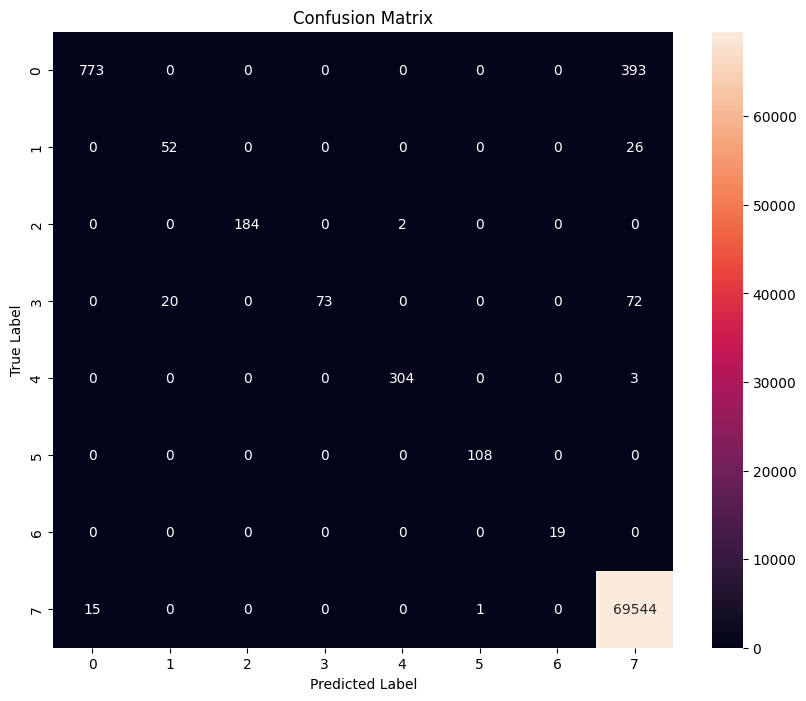

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluate the Logistic Regression model on test data
test_accuracy = logreg_model.score(c_predictions, y_test)
print(f'Test Accuracy: {test_accuracy}')

# Generate classification report
y_pred = logreg_model.predict(c_predictions)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


RDS MODEL TRAINING


In [ ]:
from sklearn.svm import SVC

# Train Support Vector Machine (SVM)
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Get predictions from SVM model
svm_predictions = svm_model.predict(X_test)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Get predictions from Random Forest model
rf_predictions = rf_model.predict(X_test)

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

# Combine predictions from SVM and Random Forest
combined_predictions = np.column_stack((svm_predictions, rf_predictions))

# Define DNN architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(combined_predictions.shape[1],)),
    Dense(32, activation='relu'),
    Dense(8, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the DNN with early stopping
history = model.fit(combined_predictions, y_test, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Save the trained model
model.save('RDS_model.h5')


Epoch 1/100
1790/1790 [==============================] - 8s 4ms/step - loss: 0.0812 - accuracy: 0.9822 - val_loss: 0.0563 - val_accuracy: 0.9896
Epoch 2/100
1790/1790 [==============================] - 6s 3ms/step - loss: 0.0554 - accuracy: 0.9911 - val_loss: 0.0505 - val_accuracy: 0.9924
Epoch 3/100
1790/1790 [==============================] - 7s 4ms/step - loss: 0.0514 - accuracy: 0.9921 - val_loss: 0.0480 - val_accuracy: 0.9924
Epoch 4/100
1790/1790 [==============================] - 6s 3ms/step - loss: 0.0491 - accuracy: 0.9926 - val_loss: 0.0474 - val_accuracy: 0.9929
Epoch 5/100
1790/1790 [==============================] - 7s 4ms/step - loss: 0.0479 - accuracy: 0.9928 - val_loss: 0.0478 - val_accuracy: 0.9929
Epoch 6/100
1790/1790 [==============================] - 6s 3ms/step - loss: 0.0478 - accuracy: 0.9929 - val_loss: 0.0451 - val_accuracy: 0.9929
Epoch 7/100
1790/1790 [==============================] - 8s 4ms/step - loss: 0.0471 - accuracy: 0.9929 - val_loss: 0.0456 - val_ac

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model('RDS_model.h5')


In [ ]:
# Print training accuracy and loss
training_accuracy = history.history['accuracy'][-1]
training_loss = history.history['loss'][-1]
print(f'Training Accuracy: {training_accuracy}')
print(f'Training Loss: {training_loss}')


Training Accuracy: 0.9930680394172668
Training Loss: 0.0461781807243824


2238/2238 [==============================] - 5s 2ms/step - loss: 0.0452 - accuracy: 0.9931
Test Loss: 0.0451948456466198
Test Accuracy: 0.9931414127349854
2238/2238 [==============================] - 4s 2ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.66      0.80      1166
           1       1.00      0.67      0.80        78
           2       1.00      1.00      1.00       186
           3       1.00      0.56      0.72       165
           4       1.00      1.00      1.00       307
           5       1.00      1.00      1.00       108
           6       1.00      1.00      1.00        19
           7       0.99      1.00      1.00     69560

    accuracy                           0.99     71589
   macro avg       1.00      0.86      0.91     71589
weighted avg       0.99      0.99      0.99     71589



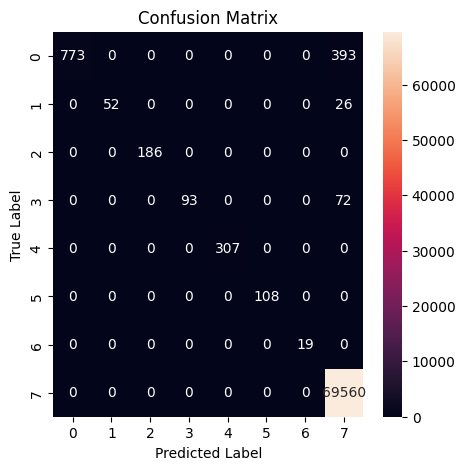

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluate the loaded model on test data
test_loss, test_accuracy = loaded_model.evaluate(combined_predictions, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Generate classification report
y_pred_proba = loaded_model.predict(combined_predictions)
y_pred = np.argmax(y_pred_proba, axis=1)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


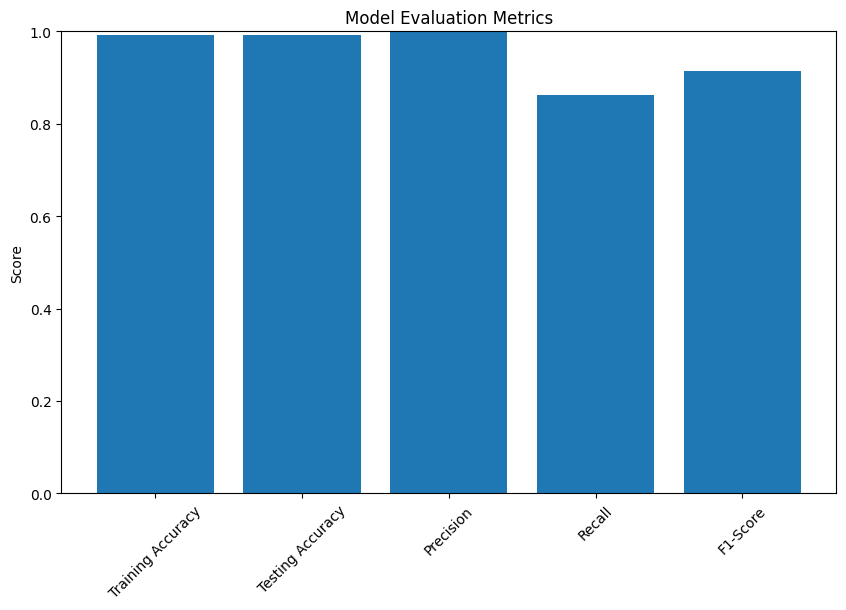

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, precision_recall_fscore_support

precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')

# Plotting
metrics = ['Training Accuracy', 'Testing Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [training_accuracy, test_accuracy, precision, recall, f1_score]

plt.figure(figsize=(10, 6))
plt.bar(metrics, values)
plt.ylabel('Score')
plt.title('Model Evaluation Metrics')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()




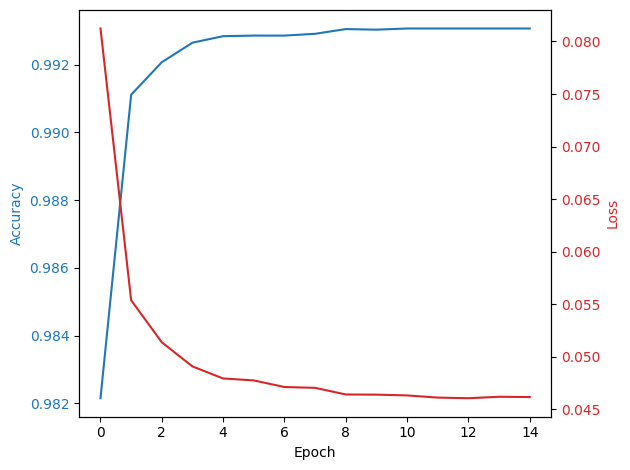

In [ ]:
import matplotlib.pyplot as plt

# Get training history
training_accuracy = history.history['accuracy']
training_loss = history.history['loss']

# Create subplots
fig, ax1 = plt.subplots()

# Plot accuracy
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy', color='tab:blue')
ax1.plot(training_accuracy, color='tab:blue', label='Accuracy')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis for loss
ax2 = ax1.twinx()
ax2.set_ylabel('Loss', color='tab:red')
ax2.plot(training_loss, color='tab:red', label='Loss')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Add legend
fig.tight_layout()
plt.show()


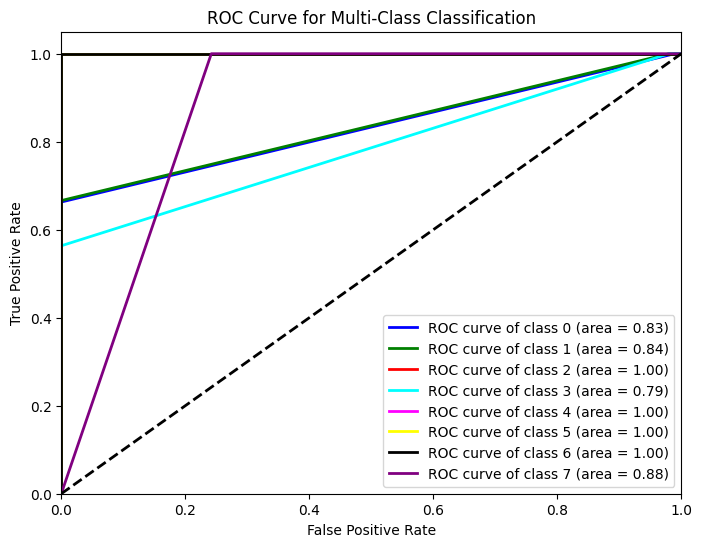

In [ ]:
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle

# Binarize the labels
y_bin = label_binarize(y_test, classes=np.unique(y_test))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_bin.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr_micro, tpr_micro, _ = roc_curve(y_bin.ravel(), y_pred_proba.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Plot ROC curve
plt.figure(figsize=(8, 6))
colors = cycle(['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'purple', 'orange', 'brown'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification')
plt.legend(loc="lower right")
plt.show()


In [ ]:

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                192       
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 8)                 264       
                                                                 
Total params: 2536 (9.91 KB)
Trainable params: 2536 (9.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


TESTING BY INDIVIDUAL SAMPLES

In [ ]:
print(combined_predictions)


[[7 7]
 [7 7]
 [7 0]
 ...
 [7 7]
 [7 7]
 [7 7]]


In [ ]:
# Actual class labels
print(y_test)

149672    7
60827     7
298819    0
12035     7
202636    7
         ..
339763    7
78954     7
145815    7
53837     7
45300     7
Name: normality_code, Length: 71589, dtype: int64


In [ ]:
import pandas as pd

# Combine the predictions and labels into a DataFrame
results_df = pd.DataFrame({
    'combined_predictions': combined_predictions.tolist(),  # Convert NumPy array to list
    'predicted_labels': y_pred,
    'actual_labels': y_test
})

# Save the DataFrame to a CSV file
results_df.to_csv('model_predictions.csv', index=False)

#JUST TO UNDERSTAND DATA

In [ ]:
import numpy as np

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('RDS_model.h5')

# Define the input data (replace this with your actual input data)
input_data = np.array([[8,0]])

# Check if input data is within bounds
if np.any(input_data < 0) or np.any(input_data > 7):
    print("Error: Input data is out of bounds (0-7).")
else:
    # Make predictions
    predictions = model.predict(input_data)

    # Print the predicted class
    predicted_class = np.argmax(predictions)
    print("Predicted Class:", predicted_class)


Error: Input data is out of bounds (0-7).


In [ ]:
from tensorflow.keras.models import load_model
# Load the trained model
model = load_model('RDS_model.h5')

# Define the input data (replace this with your actual input data)
input_data = np.array([[7,4]])

# Make predictions
predictions = model.predict(input_data)

# Print the predicted class
predicted_class = np.argmax(predictions)
print("Predicted Class:", predicted_class)

1/1 [==============================] - 0s 257ms/step
Predicted Class: 4


ADVERSARIAL ATTACKS

In [ ]:

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the selected features
selected_features = ['location_relationship', 'destinationServiceType_code', 'sourceType_code', 'sourceID_code', 'value']
num_features = len(selected_features)

# Define the DNN model
attack_model = Sequential([
    Dense(64, activation='relu', input_shape=(num_features,)),
    Dense(32, activation='relu'),
    Dense(8, activation='softmax')
])

attack_model.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

# Save the DNN model
attack_model.save("attack_model.h5")


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


ATTACK1-JSMA

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
import csv

# Load the saved DNN model
attack_model = load_model("attack_model.h5")
def jsma_attack(model, input_sample, theta=1.0, gamma=0.1, clip_min=0, clip_max=1, max_iters=10):
    input_tensor = tf.convert_to_tensor(input_sample.reshape(1, -1), dtype=tf.float32)
    adv_jsma = input_sample.copy()
    perturbation = np.zeros_like(input_sample)

    for _ in range(max_iters):
        with tf.GradientTape() as tape:
            tape.watch(input_tensor)
            output = model(input_tensor)
            loss_value = tf.keras.losses.sparse_categorical_crossentropy([np.argmax(output)], output)
        gradient = tape.gradient(loss_value, input_tensor)
        gradient_reshaped = np.reshape(gradient.numpy(), perturbation.shape)

        # Compute saliency map
        saliency_map = np.abs(gradient_reshaped) * (input_sample - clip_min) * (clip_max - input_sample)

        # Choose features with saliency above theta
        features_to_perturb = np.where(saliency_map > theta)

        # Update perturbations for selected features
        perturbation[features_to_perturb] += gamma * np.sign(gradient_reshaped[features_to_perturb])

        # Clip perturbations to stay within the specified range
        perturbation = np.clip(perturbation, clip_min - input_sample, clip_max - input_sample)

        adv_jsma = np.clip(input_sample + perturbation, clip_min, clip_max)
        if np.argmax(model.predict(adv_jsma.reshape(1, -1))) != np.argmax(model.predict(input_sample.reshape(1, -1))):
            break

    return adv_jsma
# Take a small subset of test data
subset_size = 1500
subset_indices = np.random.choice(len(X_test), subset_size, replace=False)
X_test_subset = X_test.iloc[subset_indices]
y_test_subset = y_test.iloc[subset_indices]

# Example usage of JSMA attack with the subset of test data
header = X_test.columns.tolist() + ['normality_code']
csv_file_name = "jsma_samples.csv"

with open(csv_file_name, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(header)

    for index, row in X_test_subset.iterrows():
        original_sample = row.values

        adversarial_sample = jsma_attack(attack_model, original_sample)

        # Predict the label for the adversarial sample
        predicted_label = np.argmax(attack_model.predict(adversarial_sample.reshape(1, -1)))

        writer.writerow(list(adversarial_sample) + [predicted_label])

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 31ms/step


In [ ]:
#jsma
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the data for training and testing the DNN model
data_j = pd.read_csv("jsma_samples.csv")
X_dnn = data_j.drop(columns=['normality_code'])
y_dnn = data_j['normality_code']

# Split the data into training and testing sets
X_dnn_train, X_dnn_test, y_dnn_train, y_dnn_test = train_test_split(X_dnn, y_dnn, test_size=0.2, random_state=42)

# Define DNN architecture
js = Sequential([
    Dense(64, activation='relu', input_shape=(X_dnn_train.shape[1],), name='input_layer'),
    Dense(32, activation='relu', name='hidden_layer1'),
    Dense(8, activation='softmax', name='output_layer')
])

# Compile the DNN model
js.compile(optimizer='adam',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the DNN model with early stopping
history = js.fit(X_dnn_train, y_dnn_train, epochs=5, batch_size=32,
                 validation_split=0.2, callbacks=[early_stopping])

# Create a history dictionary
history_dict_js = {
    "loss": history.history["loss"],
    "accuracy": history.history["accuracy"],
    "val_loss": history.history["val_loss"],
    "val_accuracy": history.history["val_accuracy"]
}

# Evaluate the DNN model on the testing data
js_test_loss, js_test_accuracy = js.evaluate(X_dnn_test, y_dnn_test)
print("JSMA Test Loss:", js_test_loss)
print("JSMA Test Accuracy:", js_test_accuracy)

# Plot train and validation accuracy
train_accuracy_js = history_dict_js['accuracy']
val_accuracy_js = history_dict_js['val_accuracy']
epochs_js = range(1, len(train_accuracy_js) + 1)


Epoch 1/5
30/30 [==============================] - 1s 11ms/step - loss: 1.7296 - accuracy: 0.5042 - val_loss: 1.2697 - val_accuracy: 0.9500
Epoch 2/5
30/30 [==============================] - 0s 4ms/step - loss: 0.9785 - accuracy: 0.9219 - val_loss: 0.6713 - val_accuracy: 0.9500
Epoch 3/5
30/30 [==============================] - 0s 4ms/step - loss: 0.6164 - accuracy: 0.9219 - val_loss: 0.4579 - val_accuracy: 0.9500
Epoch 4/5
30/30 [==============================] - 0s 4ms/step - loss: 0.4687 - accuracy: 0.9219 - val_loss: 0.3463 - val_accuracy: 0.9500
Epoch 5/5
10/10 [==============================] - 0s 2ms/step - loss: 0.2691 - accuracy: 0.9433
JSMA Test Loss: 0.2690819203853607
JSMA Test Accuracy: 0.9433333277702332


In [ ]:
from sklearn.metrics import classification_report

# Get predictions on the test data
y_pred = np.argmax(js.predict(X_dnn_test), axis=1)

# Print classification report
print("Classification Report for JSMA:")
print(classification_report(y_dnn_test, y_pred))

10/10 [==============================] - 0s 3ms/step
Classification Report for JSMA:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         8
           3       0.94      1.00      0.97       144
           4       0.95      0.94      0.94       148

    accuracy                           0.94       300
   macro avg       0.63      0.65      0.64       300
weighted avg       0.92      0.94      0.93       300



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


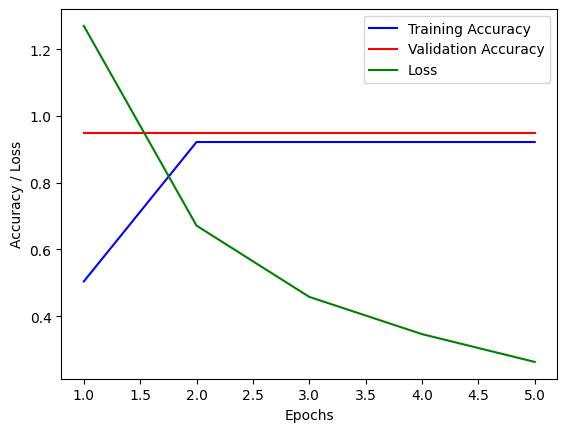

In [ ]:
# Plot train and validation accuracy and loss
train_accuracy_js = history_dict_js['accuracy']
val_accuracy_js = history_dict_js['val_accuracy']
val_loss_js = history_dict_js['val_loss']
epochs_js = range(1, len(train_accuracy_js) + 1)

plt.plot(epochs_js, train_accuracy_js, 'b', label='Training Accuracy')
plt.plot(epochs_js, val_accuracy_js, 'r', label='Validation Accuracy')
plt.plot(epochs_js, val_loss_js, 'green', label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy / Loss')
plt.legend()
plt.show()


ATTACK2-FGSM

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
import csv

# Load the saved DNN model
attack_model = load_model("attack_model.h5")

def fgsm_attack(model, input_sample, epsilon=0.1):
    input_tensor = tf.convert_to_tensor(input_sample.reshape(1, -1), dtype=tf.float32)

    with tf.GradientTape() as tape:
        tape.watch(input_tensor)
        output = model(input_tensor)
        loss = tf.keras.losses.sparse_categorical_crossentropy([np.argmax(output)], output)

    gradient = tape.gradient(loss, input_tensor)
    perturbation = epsilon * tf.sign(gradient)

    adv_fgsm = input_sample + perturbation
    adv_fgsm = np.clip(adv_fgsm, 0, 1)

    return adv_fgsm

# Take a small subset of test data
subset_size = 1500
subset_indices = np.random.choice(len(X_test), subset_size, replace=False)
X_test_subset = X_test.iloc[subset_indices]
y_test_subset = y_test.iloc[subset_indices]

# Example usage of FGSM attack with the subset of test data
csv_file_name = "fgsm_samples.csv"

with open(csv_file_name, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(X_test.columns.tolist() + ['normality_code'])

    for index, row in X_test_subset.iterrows():
        original_sample = row.values

        # Call fgsm_attack
        adversarial_sample = fgsm_attack(attack_model, original_sample)

        # Predict the label for the adversarial sample
        predicted_label = np.argmax(attack_model.predict(adversarial_sample.reshape(1, -1)))

        # Write adversarial sample and predicted label to CSV file
        writer.writerow([int(val) for val in adversarial_sample.flatten()] + [predicted_label])



1/1 [==============================] - 0s 72ms/step


In [ ]:
#fgsm
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

# Load the data for training and testing the DNN model
data = pd.read_csv("fgsm_samples.csv")
X_dnn = data.drop(columns=['normality_code'])
y_dnn = data['normality_code']

# Split the data into training and testing sets
X_dnn_train, X_dnn_test, y_dnn_train, y_dnn_test = train_test_split(X_dnn, y_dnn, test_size=0.2, random_state=42)

# Define DNN architecture
dnn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_dnn_train.shape[1],), name='input_layer'),
    Dense(32, activation='relu', name='hidden_layer1'),
    Dense(8, activation='softmax', name='output_layer')
])

# Compile the DNN model
dnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the DNN model with early stopping
history = dnn_model.fit(X_dnn_train, y_dnn_train, epochs=10, batch_size=32,
                        validation_split=0.2, callbacks=[early_stopping])

# Evaluate the DNN model on the testing data
dnn_test_loss, dnn_test_accuracy = dnn_model.evaluate(X_dnn_test, y_dnn_test)
print("FGSM Test Loss:", dnn_test_loss)
print("FGSM Test Accuracy:", dnn_test_accuracy)

# Create a history dictionary
history_dict = {
    "loss": history.history["loss"],
    "accuracy": history.history["accuracy"],
    "val_loss": history.history["val_loss"],
    "val_accuracy": history.history["val_accuracy"],
    "test_accuracy": dnn_test_accuracy
}


Epoch 1/10
30/30 [==============================] - 1s 9ms/step - loss: 1.2200 - accuracy: 0.8958 - val_loss: 0.5524 - val_accuracy: 0.9417
Epoch 2/10
30/30 [==============================] - 0s 4ms/step - loss: 0.4184 - accuracy: 0.9104 - val_loss: 0.2310 - val_accuracy: 0.9417
Epoch 3/10
30/30 [==============================] - 0s 4ms/step - loss: 0.2698 - accuracy: 0.9104 - val_loss: 0.1906 - val_accuracy: 0.9417
Epoch 4/10
30/30 [==============================] - 0s 4ms/step - loss: 0.2044 - accuracy: 0.9104 - val_loss: 0.1598 - val_accuracy: 0.9417
Epoch 5/10
30/30 [==============================] - 0s 5ms/step - loss: 0.1545 - accuracy: 0.9344 - val_loss: 0.1332 - val_accuracy: 0.9792
Epoch 6/10
30/30 [==============================] - 0s 4ms/step - loss: 0.1112 - accuracy: 0.9750 - val_loss: 0.1084 - val_accuracy: 0.9792
Epoch 7/10
30/30 [==============================] - 0s 4ms/step - loss: 0.0777 - accuracy: 0.9760 - val_loss: 0.0877 - val_accuracy: 0.9875
Epoch 8/10
30/30 [==

In [ ]:
from sklearn.metrics import classification_report

# Get predictions on the test data
y_pred = np.argmax(dnn_model.predict(X_dnn_test), axis=1)

# Print classification report
print("Classification Report:")
print(classification_report(y_dnn_test, y_pred))


10/10 [==============================] - 0s 2ms/step
Classification Report:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         2
           5       1.00      1.00      1.00        26
           6       0.99      1.00      1.00       272

    accuracy                           0.99       300
   macro avg       0.66      0.67      0.67       300
weighted avg       0.99      0.99      0.99       300



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


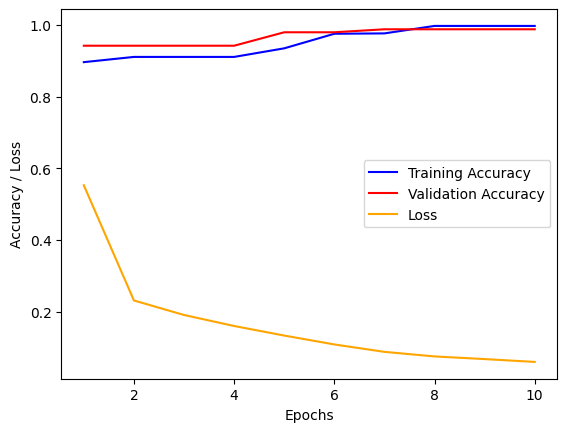

In [ ]:
import matplotlib.pyplot as plt

# Get the training history from history_dict
train_accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
val_loss = history_dict['val_loss']
test_accuracy = history_dict['test_accuracy']

# Create a list of epochs for x-axis
epochs = range(1, len(train_accuracy) + 1)

# Plot train, validation, and test accuracy
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.plot(epochs, val_loss, 'orange', label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy / Loss')
plt.legend()
plt.show()


ATTACK3-PGD

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
import csv

# Load the saved DNN model
attack_model = load_model("attack_model.h5")

def pgd_attack(model, input_sample, epsilon=0.1, alpha=0.01, num_iterations=40):
    input_tensor = tf.convert_to_tensor(input_sample.reshape(1, -1), dtype=tf.float32)

    perturbation = tf.zeros_like(input_tensor)
    perturbation = tf.clip_by_value(perturbation, -epsilon, epsilon)

    for _ in range(num_iterations):
        with tf.GradientTape() as tape:
            tape.watch(input_tensor)
            output = model(input_tensor + perturbation)
            loss = tf.keras.losses.sparse_categorical_crossentropy([np.argmax(output)], output)

        gradient = tape.gradient(loss, input_tensor)
        perturbation = perturbation + alpha * tf.sign(gradient)
        perturbation = tf.clip_by_value(perturbation, -epsilon, epsilon)

    adv_pgd = input_sample + perturbation.numpy().reshape(-1)
    adv_pgd = np.clip(adv_pgd, 0, 1)

    return adv_pgd

# Take a small subset of test data
subset_size = 1500
subset_indices = np.random.choice(len(X_test), subset_size, replace=False)
X_test_subset = X_test.iloc[subset_indices]
y_test_subset = y_test.iloc[subset_indices]

# Example usage of PGD attack with the subset of test data
csv_file_name = "pgd_samples.csv"

with open(csv_file_name, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(X_test.columns.tolist() + ['normality_code'])

    for index, row in X_test_subset.iterrows():
        original_sample = row.values

        # Call pgd_attack
        adversarial_sample = pgd_attack(attack_model, original_sample)

        # Predict the label for the adversarial sample
        predicted_label = np.argmax(attack_model.predict(adversarial_sample.reshape(1, -1)))

        # Write adversarial sample and predicted label to CSV file
        writer.writerow([int(val) for val in adversarial_sample.flatten()] + [predicted_label])


1/1 [==============================] - 0s 20ms/step


In [ ]:
#pgd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

# Load the data for training and testing the DNN model
data_p = pd.read_csv("pgd_samples.csv")
X_dnn = data_p.drop(columns=['normality_code'])
y_dnn = data_p['normality_code']

# Split the data into training and testing sets
X_dnn_train, X_dnn_test, y_dnn_train, y_dnn_test = train_test_split(X_dnn, y_dnn, test_size=0.2, random_state=42)

# Define DNN architecture
p = Sequential([
    Dense(64, activation='relu', input_shape=(X_dnn_train.shape[1],), name='input_layer'),
    Dense(32, activation='relu', name='hidden_layer1'),
    Dense(8, activation='softmax', name='output_layer')
])

# Compile the DNN model
p.compile(optimizer='adam',
          loss='sparse_categorical_crossentropy',
          metrics=['accuracy'])

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the DNN model with early stopping and store the history
history = p.fit(X_dnn_train, y_dnn_train, epochs=5, batch_size=32,
                validation_split=0.2, callbacks=[early_stopping])

# Evaluate the DNN model on the testing data
dnn_test_loss, dnn_test_accuracy = p.evaluate(X_dnn_test, y_dnn_test)
print("PGD Test Accuracy:", dnn_test_accuracy)

# Create a dictionary to store the training history
history_dict = history.history


Epoch 1/5
30/30 [==============================] - 2s 9ms/step - loss: 1.6511 - accuracy: 0.5958 - val_loss: 0.9801 - val_accuracy: 0.9125
Epoch 2/5
30/30 [==============================] - 0s 5ms/step - loss: 0.5960 - accuracy: 0.9167 - val_loss: 0.3607 - val_accuracy: 0.9125
Epoch 3/5
30/30 [==============================] - 0s 4ms/step - loss: 0.3187 - accuracy: 0.9167 - val_loss: 0.2812 - val_accuracy: 0.9125
Epoch 4/5
30/30 [==============================] - 0s 4ms/step - loss: 0.2678 - accuracy: 0.9167 - val_loss: 0.2428 - val_accuracy: 0.9125
Epoch 5/5
10/10 [==============================] - 0s 3ms/step - loss: 0.2721 - accuracy: 0.8933
PGD Test Accuracy: 0.8933333158493042


In [ ]:
from sklearn.metrics import classification_report

# Make predictions on the test data
predictions = p.predict(X_dnn_test)
predicted_labels = np.argmax(predictions, axis=1)

# Print classification report
print("Classification Report for PGD:")
print(classification_report(y_dnn_test, predicted_labels))


10/10 [==============================] - 0s 2ms/step
Classification Report for PGD:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00        27
           6       0.89      1.00      0.94       268

    accuracy                           0.89       300
   macro avg       0.30      0.33      0.31       300
weighted avg       0.80      0.89      0.84       300



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


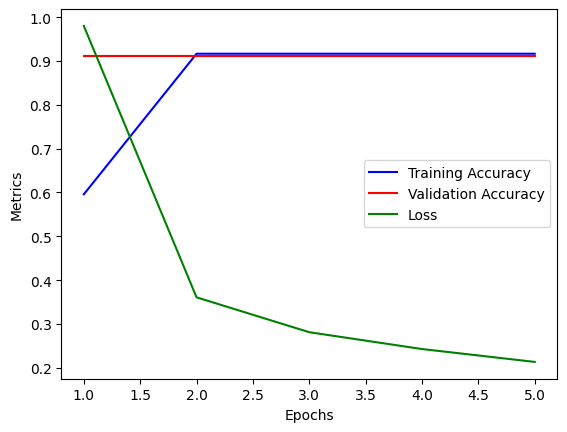

In [ ]:
# Plot train accuracy, validation accuracy, and validation loss
train_accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
val_loss = history_dict['val_loss']
epochs = range(1, len(train_accuracy) + 1)

plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.plot(epochs, val_loss, 'g', label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.legend()
plt.show()

ATTACK4-BIM

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
import csv

# Load the saved DNN model
attack_model = load_model("attack_model.h5")

def bim_attack(model, input_sample, epsilon=0.1, alpha=0.01, num_iterations=40):
    input_tensor = tf.convert_to_tensor(input_sample.reshape(1, -1), dtype=tf.float32)

    perturbation = tf.zeros_like(input_tensor)

    for _ in range(num_iterations):
        with tf.GradientTape() as tape:
            tape.watch(input_tensor)
            output = model(input_tensor + perturbation)
            loss = tf.keras.losses.sparse_categorical_crossentropy([np.argmax(output)], output)

        gradient = tape.gradient(loss, input_tensor)
        perturbation = perturbation + alpha * tf.sign(gradient)
        perturbation = tf.clip_by_value(perturbation, -epsilon, epsilon)

    adv_bim = input_sample + perturbation.numpy().reshape(-1)
    adv_bim = np.clip(adv_bim, 0, 1)

    return adv_bim

# Take a small subset of test data
subset_size = 1500
subset_indices = np.random.choice(len(X_test), subset_size, replace=False)
X_test_subset = X_test.iloc[subset_indices]
y_test_subset = y_test.iloc[subset_indices]

# Example usage of BIM attack with the subset of test data
csv_file_name = "bim_samples.csv"

with open(csv_file_name, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(X_test.columns.tolist() + ['normality_code'])

    for index, row in X_test_subset.iterrows():
        original_sample = row.values

        # Call bim_attack
        adversarial_sample = bim_attack(attack_model, original_sample)

        # Predict the label for the adversarial sample
        predicted_label = np.argmax(attack_model.predict(adversarial_sample.reshape(1, -1)))

        # Write adversarial sample and predicted label to CSV file
        writer.writerow([int(val) for val in adversarial_sample.flatten()] + [predicted_label])


1/1 [==============================] - 0s 20ms/step


In [ ]:
#bim
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the data for training and testing the DNN model
data_b = pd.read_csv("bim_samples.csv")
X_dnn = data_b.drop(columns=['normality_code'])
y_dnn = data_b['normality_code']

# Split the data into training and testing sets
X_dnn_train, X_dnn_test, y_dnn_train, y_dnn_test = train_test_split(X_dnn, y_dnn, test_size=0.2, random_state=42)

# Define DNN architecture
b = Sequential([
    Dense(64, activation='relu', input_shape=(X_dnn_train.shape[1],), name='input_layer'),
    Dense(32, activation='relu', name='hidden_layer1'),
    Dense(8, activation='softmax', name='output_layer')
])

# Compile the DNN model
b.compile(optimizer='adam',
          loss='sparse_categorical_crossentropy',
          metrics=['accuracy'])

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the DNN model with early stopping
history = b.fit(X_dnn_train, y_dnn_train, epochs=10, batch_size=32,
                validation_split=0.2, callbacks=[early_stopping])

# Create a history dictionary
history_dict_b = {
    "loss": history.history["loss"],
    "accuracy": history.history["accuracy"],
    "val_loss": history.history["val_loss"],
    "val_accuracy": history.history["val_accuracy"]
}

# Evaluate the DNN model on the testing data
dnn_test_loss, dnn_test_accuracy = b.evaluate(X_dnn_test, y_dnn_test)
print("BIM Test Loss:", dnn_test_loss)
print("BIM Test Accuracy:", dnn_test_accuracy)

Epoch 1/10
30/30 [==============================] - 1s 9ms/step - loss: 1.9528 - accuracy: 0.3781 - val_loss: 1.5000 - val_accuracy: 0.4750
Epoch 2/10
30/30 [==============================] - 0s 4ms/step - loss: 1.1410 - accuracy: 0.5990 - val_loss: 0.8569 - val_accuracy: 0.9292
Epoch 3/10
30/30 [==============================] - 0s 4ms/step - loss: 0.6577 - accuracy: 0.8375 - val_loss: 0.5846 - val_accuracy: 0.7333
Epoch 4/10
30/30 [==============================] - 0s 4ms/step - loss: 0.4561 - accuracy: 0.9135 - val_loss: 0.4279 - val_accuracy: 0.8917
Epoch 5/10
30/30 [==============================] - 0s 4ms/step - loss: 0.3252 - accuracy: 0.9187 - val_loss: 0.3113 - val_accuracy: 0.8917
Epoch 6/10
30/30 [==============================] - 0s 4ms/step - loss: 0.2401 - accuracy: 0.9187 - val_loss: 0.2421 - val_accuracy: 0.8917
Epoch 7/10
30/30 [==============================] - 0s 4ms/step - loss: 0.1942 - accuracy: 0.9208 - val_loss: 0.1984 - val_accuracy: 0.9083
Epoch 8/10
30/30 [==

In [ ]:
from sklearn.metrics import classification_report

# Make predictions on the test data
predictions = b.predict(X_dnn_test)
predicted_labels = np.argmax(predictions, axis=1)

# Print classification report
print("Classification Report for BIM:")
print(classification_report(y_dnn_test, predicted_labels))


10/10 [==============================] - 0s 5ms/step
Classification Report for BIM:
              precision    recall  f1-score   support

           1       0.61      1.00      0.75        20
           3       0.95      0.98      0.97       151
           4       0.97      0.84      0.90       129

    accuracy                           0.92       300
   macro avg       0.84      0.94      0.88       300
weighted avg       0.94      0.92      0.93       300



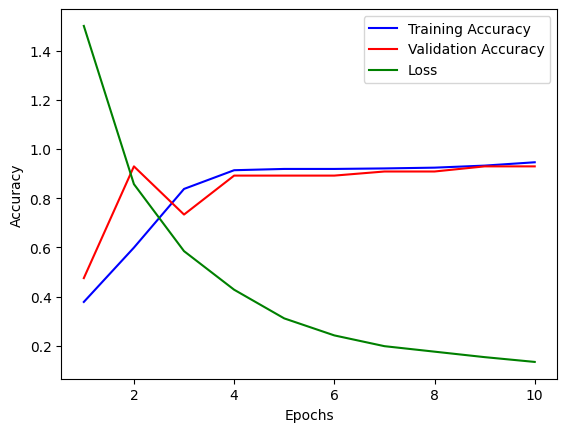

In [ ]:
# Plot train and validation accuracy
train_accuracy_b = history_dict_b['accuracy']
val_accuracy_b = history_dict_b['val_accuracy']
val_loss_b = history_dict_b['val_loss']
epochs_b = range(1, len(train_accuracy_b) + 1)

plt.plot(epochs_b, train_accuracy_b, 'b', label='Training Accuracy')
plt.plot(epochs_b, val_accuracy_b, 'r', label='Validation Accuracy')
plt.plot(epochs_b, val_loss_b, 'green', label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


**ATTACK5**-DF

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
import csv

# Load the saved DNN model
attack_model = load_model("attack_model.h5")

def deepfool_attack(model, input_sample, epsilon=1e-6, nb_grads=10, max_iterations=100, batch_size=128):
    input_tensor = tf.convert_to_tensor(input_sample.reshape(1, -1), dtype=tf.float32)
    input_adv = tf.Variable(input_tensor)

    for _ in range(max_iterations):
        with tf.GradientTape() as tape:
            tape.watch(input_adv)
            output = model(input_adv)
            target_label = tf.argmax(output, axis=1)
            target_score = tf.reduce_max(output, axis=1)

        if target_label != tf.argmax(model(input_tensor), axis=1):
            break

        gradients = tape.gradient(target_score, input_adv)
        perturbation = -tf.sign(gradients)

        # Compute minimum perturbation required to change the prediction
        w = tf.reduce_sum(tf.cast(perturbation != 0, tf.float32) * gradients, axis=1, keepdims=True)
        f = tf.reduce_sum(tf.square(output - target_score[:, tf.newaxis]), axis=1, keepdims=True)
        delta = tf.abs(f) / (tf.norm(w, axis=1) + epsilon)

        adversarial_sample = input_adv + delta * perturbation
        # Clip the adversarial sample to stay within the expected range
        adversarial_sample = tf.clip_by_value(adversarial_sample, 1.0, 200.0)
        input_adv.assign(adversarial_sample)

    return input_adv.numpy().reshape(-1)

# Take a small subset of test data
subset_size = 1500
subset_indices = np.random.choice(len(X_test), subset_size, replace=False)
X_test_subset = X_test.iloc[subset_indices]
y_test_subset = y_test.iloc[subset_indices]

# Example usage of DeepFool attack with the subset of test data
csv_file_name = "df_samples.csv"

with open(csv_file_name, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(X_test.columns.tolist() + ['normality_code'])

    for index, row in X_test_subset.iterrows():
        original_sample = row.values

        # Call deepfool_attack with provided parameters
        adversarial_sample = deepfool_attack(attack_model, original_sample,
                                              epsilon=1e-6, nb_grads=10,
                                              max_iterations=100, batch_size=128)

        # Predict the label for the adversarial sample
        predicted_label = np.argmax(attack_model.predict(adversarial_sample.reshape(1, -1)))

        # Write adversarial sample and predicted label to CSV file
        writer.writerow([int(val) for val in adversarial_sample.flatten()] + [predicted_label])


1/1 [==============================] - 0s 29ms/step


In [ ]:
#df
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the data for training and testing the DNN model
data_d = pd.read_csv("df_samples.csv")
X_dnn = data_d.drop(columns=['normality_code'])
y_dnn = data_d['normality_code']

# Split the data into training and testing sets
X_dnn_train, X_dnn_test, y_dnn_train, y_dnn_test = train_test_split(X_dnn, y_dnn, test_size=0.2, random_state=42)

# Define DNN architecture
d = Sequential([
    Dense(64, activation='relu', input_shape=(X_dnn_train.shape[1],), name='input_layer'),
    Dense(32, activation='relu', name='hidden_layer1'),
    Dense(8, activation='softmax', name='output_layer')
])

# Compile the DNN model
d.compile(optimizer='adam',
          loss='sparse_categorical_crossentropy',
          metrics=['accuracy'])

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the DNN model with early stopping
history = d.fit(X_dnn_train, y_dnn_train, epochs=10, batch_size=32,
                validation_split=0.2, callbacks=[early_stopping])

# Create a history dictionary
history_dict_d = {
    "loss": history.history["loss"],
    "accuracy": history.history["accuracy"],
    "val_loss": history.history["val_loss"],
    "val_accuracy": history.history["val_accuracy"]
}

# Evaluate the DNN model on the testing data
dnn_test_loss, dnn_test_accuracy = d.evaluate(X_dnn_test, y_dnn_test)
print("DF Test Loss:", dnn_test_loss)
print("DF Test Accuracy:", dnn_test_accuracy)

Epoch 1/10
30/30 [==============================] - 3s 18ms/step - loss: 8.2513 - accuracy: 0.6490 - val_loss: 0.2965 - val_accuracy: 0.9333
Epoch 2/10
30/30 [==============================] - 0s 8ms/step - loss: 0.1652 - accuracy: 0.9781 - val_loss: 0.2495 - val_accuracy: 0.9708
Epoch 3/10
30/30 [==============================] - 0s 4ms/step - loss: 0.1346 - accuracy: 0.9927 - val_loss: 0.2221 - val_accuracy: 0.9708
Epoch 4/10
30/30 [==============================] - 0s 4ms/step - loss: 0.1142 - accuracy: 0.9937 - val_loss: 0.1981 - val_accuracy: 0.9708
Epoch 5/10
30/30 [==============================] - 0s 4ms/step - loss: 0.0970 - accuracy: 0.9937 - val_loss: 0.1790 - val_accuracy: 0.9708
Epoch 6/10
30/30 [==============================] - 0s 4ms/step - loss: 0.0837 - accuracy: 0.9937 - val_loss: 0.1639 - val_accuracy: 0.9708
Epoch 7/10
30/30 [==============================] - 0s 4ms/step - loss: 0.0746 - accuracy: 0.9937 - val_loss: 0.1540 - val_accuracy: 0.9708
Epoch 8/10
30/30 [=

In [ ]:
from sklearn.metrics import classification_report

# Get predictions on the test data
y_pred = np.argmax(d.predict(X_dnn_test), axis=1)

# Print classification report
print("Classification Report for DF:")
print(classification_report(y_dnn_test, y_pred))

10/10 [==============================] - 0s 3ms/step
Classification Report for DF:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        87
           1       0.98      1.00      0.99       137
           3       1.00      1.00      1.00        29
           4       1.00      0.94      0.97        47

    accuracy                           0.99       300
   macro avg       0.99      0.98      0.99       300
weighted avg       0.99      0.99      0.99       300



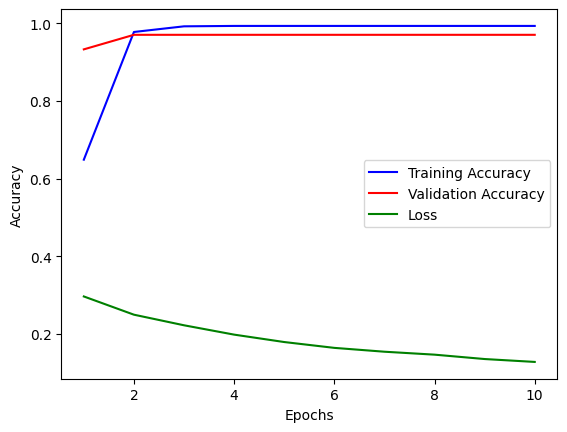

In [ ]:
# Plot train and validation accuracy
train_accuracy_d = history_dict_d['accuracy']
val_accuracy_d = history_dict_d['val_accuracy']
val_loss_d = history_dict_d['val_loss']
epochs_d = range(1, len(train_accuracy_d) + 1)

plt.plot(epochs_d, train_accuracy_d, 'b', label='Training Accuracy')
plt.plot(epochs_d, val_accuracy_d, 'r', label='Validation Accuracy')
plt.plot(epochs_d, val_loss_d, 'green', label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


ADVERSARIAL FILE CREATION

In [ ]:
import pandas as pd

In [ ]:
j=pd.read_csv('/content/jsma_samples.csv')

In [ ]:
f=pd.read_csv('/content/fgsm_samples.csv')

In [ ]:
p=pd.read_csv('/content/pgd_samples.csv')

In [ ]:
b=pd.read_csv('/content/bim_samples.csv')

In [ ]:
d=pd.read_csv('/content/df_samples.csv')

In [ ]:
# Concatenate the two datasets along the rows
adversarial = pd.concat([j,f,p,b,d], ignore_index=True)

# Save the mixed dataset
adversarial.to_csv("adversarial.csv", index=False)
m1=pd.read_csv('/content/adversarial.csv')

TESTING WITH ONLY ADVERSARIAL SAMPLES

In [ ]:
# Separate features and target variable
X_m1 = m1.drop(columns=['normality_code'])  # Assuming 'normality_code' is the target variable
y_m1 = m1['normality_code']

# Save data without the target variable in one dataframe
X_m1_without_target = X_m1.copy()

# Save only the target variable in another dataframe
y_m1_only = y_m1.copy()


In [ ]:
# For a dataframe
print("Shape of X_m1_without_target:", X_m1_without_target.shape)
print("Shape of y_m1_only:", y_m1_only.shape)



Shape of X_m1_without_target: (7500, 5)
Shape of y_m1_only: (7500,)


In [ ]:
import numpy as np
from tensorflow.keras.models import load_model

# Load the trained DNN model
model = load_model('attack_model.h5')


# Make predictions using the DNN model
predictions = model.predict(X_m1_without_target)

# Convert the predicted probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)




235/235 [==============================] - 0s 2ms/step


In [ ]:
#combined
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

# Load the data for training and testing the DNN model
data_a = pd.read_csv("adversarial.csv")
X_dnn = data_a.drop(columns=['normality_code'])
y_dnn = data_a['normality_code']

# Split the data into training and testing sets
X_dnn_train, X_dnn_test, y_dnn_train, y_dnn_test = train_test_split(X_dnn, y_dnn, test_size=0.2, random_state=42)

# Define DNN architecture
a = Sequential([
    Dense(64, activation='relu', input_shape=(X_dnn_train.shape[1],), name='input_layer'),
    Dense(32, activation='relu', name='hidden_layer1'),
    Dense(8, activation='softmax', name='output_layer')
])

# Compile the DNN model
a.compile(optimizer='adam',
          loss='sparse_categorical_crossentropy',
          metrics=['accuracy'])

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the DNN model with early stopping and store the history
history = a.fit(X_dnn_train, y_dnn_train, epochs=10, batch_size=32,
                validation_split=0.2, callbacks=[early_stopping])

# Evaluate the DNN model on the testing data
dnn_test_loss, dnn_test_accuracy = a.evaluate(X_dnn_test, y_dnn_test)
print("Combined Adversarial Samples Test Accuracy:", dnn_test_accuracy)

# Create a dictionary to store the training history
history_dict = history.history

Epoch 1/10
150/150 [==============================] - 2s 4ms/step - loss: 2.5469 - accuracy: 0.4512 - val_loss: 1.3040 - val_accuracy: 0.5458
Epoch 2/10
150/150 [==============================] - 1s 4ms/step - loss: 1.1682 - accuracy: 0.5490 - val_loss: 1.0786 - val_accuracy: 0.5508
Epoch 3/10
150/150 [==============================] - 1s 4ms/step - loss: 0.9889 - accuracy: 0.5579 - val_loss: 0.9026 - val_accuracy: 0.5683
Epoch 4/10
150/150 [==============================] - 1s 4ms/step - loss: 0.8444 - accuracy: 0.5721 - val_loss: 0.8052 - val_accuracy: 0.5675
Epoch 5/10
150/150 [==============================] - 1s 3ms/step - loss: 0.7622 - accuracy: 0.5627 - val_loss: 0.7445 - val_accuracy: 0.5750
Epoch 6/10
150/150 [==============================] - 0s 3ms/step - loss: 0.7132 - accuracy: 0.5625 - val_loss: 0.6969 - val_accuracy: 0.5733
Epoch 7/10
150/150 [==============================] - 1s 4ms/step - loss: 0.6724 - accuracy: 0.5825 - val_loss: 0.6699 - val_accuracy: 0.5708
Epoch 

In [ ]:
from sklearn.metrics import classification_report

# Make predictions on the test data
predictions = a.predict(X_dnn_test)
predicted_labels = np.argmax(predictions, axis=1)

# Print classification report
print("Classification Report:")
print(classification_report(y_dnn_test, predicted_labels))


47/47 [==============================] - 0s 2ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        97
           1       0.84      0.91      0.87       146
           3       1.00      0.13      0.22       316
           4       0.68      0.22      0.33       339
           5       0.54      0.77      0.64        53
           6       0.51      0.95      0.66       549

    accuracy                           0.60      1500
   macro avg       0.76      0.66      0.62      1500
weighted avg       0.72      0.60      0.54      1500



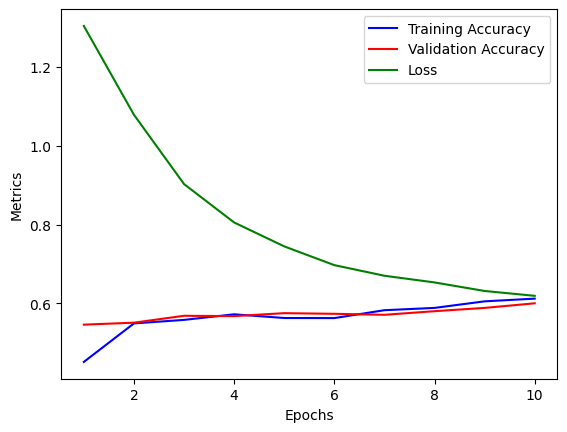

In [ ]:
# Plot train accuracy, validation accuracy, and validation loss
train_accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
val_loss = history_dict['val_loss']
epochs = range(1, len(train_accuracy) + 1)

plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.plot(epochs, val_loss, 'g', label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.legend()
plt.show()

NEW TRAINING SET

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

# Shuffle the adversarial samples
shuffled_indices = np.random.permutation(len(X_m1_without_target))
shuffled_X_m1 = X_m1_without_target.iloc[shuffled_indices]
shuffled_y_m1 = y_m1_only.iloc[shuffled_indices]

# Split the shuffled adversarial samples
X_train_adversarial, X_test_adversarial, y_train_adversarial, y_test_adversarial = train_test_split(
    shuffled_X_m1, shuffled_y_m1, test_size=0.4)

# Combine 60% of adversarial samples with the original training set
X_new_train = pd.concat([X_train_adversarial, X_train])
y_new_train = pd.concat([y_train_adversarial, y_train])

# Combine 40% of adversarial samples with the original testing set
X_new_test = pd.concat([X_test_adversarial, X_test])
y_new_test = pd.concat([y_test_adversarial, y_test])



In [ ]:
import numpy as np

# Combine X_m1_without_target and X_train to form a new training set
X_new_train = np.concatenate((X_m1_without_target, X_train), axis=0)

# Combine y_m1_only and y_train to form a new target set
y_new_train = np.concatenate((y_m1_only, y_train), axis=0)


In [ ]:
print("Shape of X_new_train:", X_new_train.shape)
print("Shape of y_new_train:", y_new_train.shape)


Shape of X_new_train: (293852, 5)
Shape of y_new_train: (293852,)


RE-TRAINING

In [ ]:
from sklearn.svm import SVC
# Train Support Vector Machine (SVM)
svm_model = SVC()
svm_model.fit(X_new_train, y_new_train)
# Get predictions from SVM model
svm_predictions = svm_model.predict(X_new_test)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Train Random Forest
rmodel = RandomForestClassifier()
rmodel.fit(X_new_train, y_new_train)
# Get predictions from Random Forest model
rpredictions = rmodel.predict(X_new_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Combine predictions from SVM and Random Forest
combined = np.column_stack((svm_predictions, rpredictions))

# Define DNN architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(combined.shape[1],)),
    Dense(32, activation='relu'),
    Dense(8, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Sparse categorical cross-entropy loss for numerical labels
              metrics=['accuracy'])

# Train the DNN
history = model.fit(combined, y_new_test, epochs=10, batch_size=32, validation_split=0.2)

# Save the trained model
model.save('retrained_model.h5')


Epoch 1/10
1865/1865 [==============================] - 8s 4ms/step - loss: 0.1885 - accuracy: 0.9445 - val_loss: 0.0612 - val_accuracy: 0.9877
Epoch 2/10
1865/1865 [==============================] - 8s 4ms/step - loss: 0.1063 - accuracy: 0.9680 - val_loss: 0.0529 - val_accuracy: 0.9904
Epoch 3/10
1865/1865 [==============================] - 7s 4ms/step - loss: 0.0961 - accuracy: 0.9720 - val_loss: 0.0524 - val_accuracy: 0.9933
Epoch 4/10
1865/1865 [==============================] - 7s 4ms/step - loss: 0.0926 - accuracy: 0.9725 - val_loss: 0.0515 - val_accuracy: 0.9933
Epoch 5/10
1865/1865 [==============================] - 7s 4ms/step - loss: 0.0907 - accuracy: 0.9728 - val_loss: 0.0488 - val_accuracy: 0.9933
Epoch 6/10
1865/1865 [==============================] - 7s 4ms/step - loss: 0.0900 - accuracy: 0.9723 - val_loss: 0.0488 - val_accuracy: 0.9933
Epoch 7/10
1865/1865 [==============================] - 7s 4ms/step - loss: 0.0896 - accuracy: 0.9725 - val_loss: 0.0480 - val_accuracy:

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
re_model = load_model('/content/retrained_model.h5')


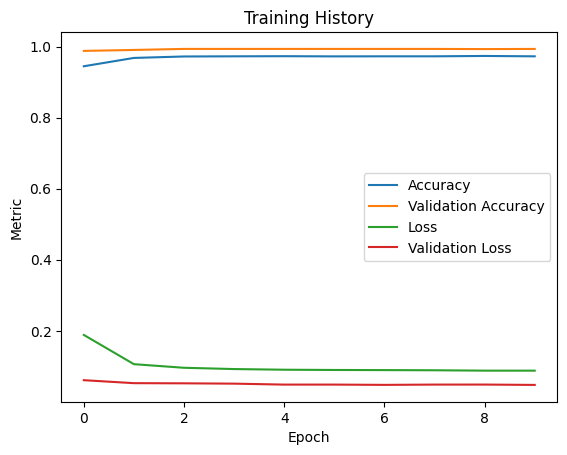

In [ ]:
import matplotlib.pyplot as plt

# Plot training history
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('Training History')
plt.legend()
plt.show()


In [ ]:
# Print training accuracy and loss
training_accuracy = history.history['accuracy'][-1]
training_loss = history.history['loss'][-1]
print(f'Re-Training Accuracy: {training_accuracy}')
print(f'Re-Training Loss: {training_loss}')


Re-Training Accuracy: 0.9724656939506531
Re-Training Loss: 0.08804438263177872


2331/2331 [==============================] - 6s 2ms/step - loss: 0.0791 - accuracy: 0.9775
Test Loss: 0.07912341505289078
Test Accuracy: 0.9775301814079285
2331/2331 [==============================] - 4s 2ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.71      0.83      1348
           1       0.88      0.90      0.89       389
           2       1.00      1.00      1.00       186
           3       1.00      0.19      0.32       794
           4       0.68      0.80      0.73       986
           5       0.79      0.87      0.82       203
           6       0.51      0.67      0.58      1123
           7       0.99      1.00      1.00     69560

    accuracy                           0.98     74589
   macro avg       0.86      0.77      0.77     74589
weighted avg       0.98      0.98      0.98     74589



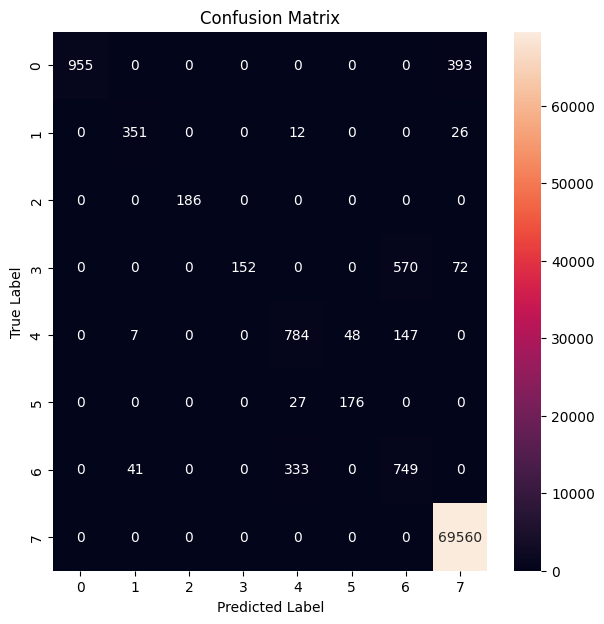

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(combined, y_new_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Generate classification report
pred_proba = model.predict(combined)
pred = np.argmax(pred_proba, axis=1)
print("Classification Report:")
print(classification_report(y_new_test, pred))

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_new_test, pred)

# Plot confusion matrix
plt.figure(figsize=(7,7))
sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

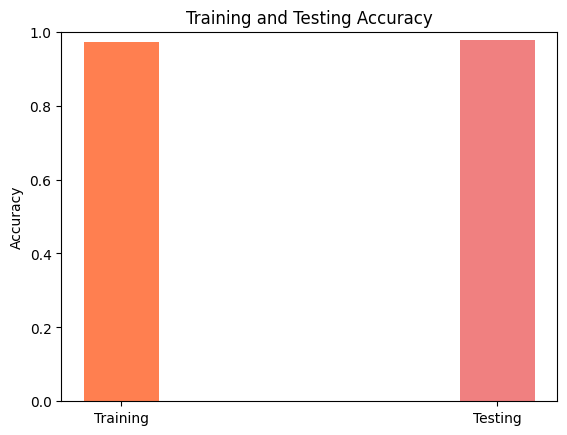

In [ ]:
import matplotlib.pyplot as plt

# Plotting
plt.bar(['Training', 'Testing'], [train_accuracy, test_accuracy], color=['coral', 'lightcoral'], width=0.2, align='center')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy')
plt.ylim(0, 1)
plt.show()


2331/2331 [==============================] - 8s 3ms/step


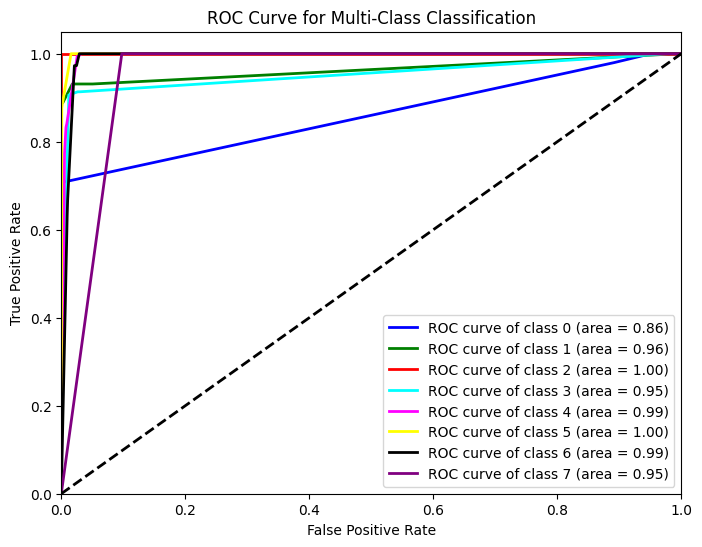

In [ ]:
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle

# Binarize the labels for the test data
y_bin = label_binarize(y_new_test, classes=np.unique(y_new_test))

# Get the predicted probabilities for each class using the retrained model
y_pred_proba = re_model.predict(combined)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_bin.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr_micro, tpr_micro, _ = roc_curve(y_bin.ravel(), y_pred_proba.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Plot ROC curve
plt.figure(figsize=(8, 6))
colors = cycle(['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'purple', 'orange', 'brown'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification')
plt.legend(loc="lower right")
plt.show()


In [ ]:
import pandas as pd

# Load the CSV files
file1 = pd.read_csv('adversarial.csv')
file2 = pd.read_csv('feature_extracted.csv')

# Find common features
common_features = list(set(file1.columns) & set(file2.columns))

# Filter rows to include only those present in both files
file1_common = file1[common_features]
file2_common = file2[common_features]

# Concatenate the rows of both DataFrames
anomaly = pd.concat([file1_common, file2_common], ignore_index=True)

# Save the concatenated DataFrame to a new CSV file
anomaly.to_csv('anomaly.csv', index=False)



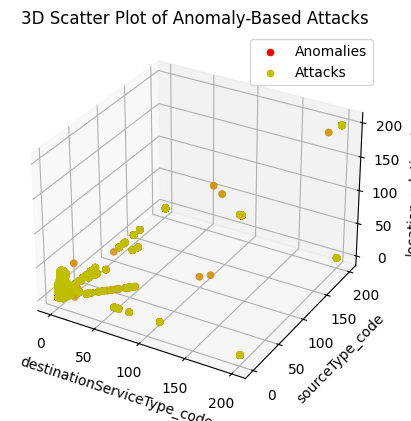

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the data from the CSV file
df = pd.read_csv('anomaly.csv')

attack_data = df[df['normality_code'].isin([0, 1, 2, 3, 4, 5, 6])]
anomaly_data = df[~df['normality_code'].isin([8,9])]

# Plot the data points
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot attacks in red
ax.scatter(attack_data['destinationServiceType_code'], attack_data['sourceType_code'], attack_data['location_relationship'], c='r', marker='o', label='Anomalies')

# Plot normal in yellow
ax.scatter(anomaly_data['destinationServiceType_code'], anomaly_data['sourceType_code'], anomaly_data['location_relationship'], c='y', marker='o', label='Attacks')

ax.set_xlabel('destinationServiceType_code')
ax.set_ylabel('sourceType_code')
ax.set_zlabel('location_relationship')

plt.title('3D Scatter Plot of Anomaly-Based Attacks')
plt.legend()
plt.show()
